In [25]:
data_dir = '/labs/sarkerlab/yguo262/simpletransformers/data/natal_sex/data_splits_5'
train_file = f'{data_dir}/train.csv'
test_file = f'{data_dir}/test.csv'

In [26]:
import sys
import pandas as pd
import numpy as np
import pickle

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
import statistics as stats
import feature_generator

from datetime import datetime
import pickle

import random

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

random.seed(0)

In [27]:
metrics = {}

# get features
train_X, train_classes, test_X, test_classes = \
        feature_generator.fit_transform(train_file, test_file)

         STUDYID                                               text label  \
0      NC_007509  (kw_male=0, kw_fem=1, -305 days from index dat...     F   
1     KPNCY9QKJG  (kw_male=3, kw_fem=1, 0 days from index date) ...     M   
2      SC_051084  (kw_male=1, kw_fem=1, -25 days from index date...     F   
3      NC_007319  (kw_male=0, kw_fem=1, -3022 days from index da...     F   
4     KPNC-QATK0  (kw_male=4, kw_fem=1, 49 days from index date)...     M   
...          ...                                                ...   ...   
1225  KPNCYC1MG5  (kw_male=1, kw_fem=0, -167 days from index dat...     F   
1226   NC_006365  (kw_male=7, kw_fem=1, 1 days from index date) ...     M   
1227   SC_075223  (kw_male=1, kw_fem=1, -14 days from index date...     F   
1228   NC_009547  (kw_male=1, kw_fem=3, 647 days from index date...     F   
1229   SC_060496  (kw_male=0, kw_fem=1, -1996 days from index da...     F   

     source                                          excerpt_1  \
0      kp

In [32]:
vectorizer = feature_generator.abs_vectorizer
vectorizer.get_feature_names()

['abd',
 'abdomen',
 'abdomen soft',
 'abdomen soft nontender',
 'abdominal',
 'abdominal pain',
 'abnormal',
 'acne',
 'active',
 'active ambulatory',
 'active ambulatory problems',
 'active problem',
 'active problem list',
 'activity',
 'additional',
 'adenopathy',
 'administered',
 'administered medications',
 'adnexa',
 'adult',
 'advised',
 'affirming',
 'age',
 'age onset',
 'ago',
 'alcohol',
 'aldactone',
 'aldactone mg',
 'aldactone mg oral',
 'aldactone mg oral tab',
 'alert',
 'allergies',
 'alt',
 'alt ast',
 'alt ast bun',
 'alt ast bun cr',
 'ambulatory',
 'ambulatory problems',
 'anesthesia',
 'anxiety',
 'appearance',
 'appearing',
 'appears',
 'apply',
 'appointment',
 'appropriate',
 'area',
 'assessment',
 'assessment plan',
 'ast',
 'ast bun',
 'ast bun cr',
 'asthma',
 'augmentation',
 'aware',
 'axillary',
 'banked',
 'banking',
 'banking sperm',
 'basename',
 'bd',
 'benefit',
 'benefits',
 'bid',
 'bilateral',
 'bilateral mastectomy',
 'bilaterally',
 'birth',


In [35]:
from matplotlib import pyplot as plt
from sklearn import svm

features_names = vectorizer.get_feature_names()
svm = svm.SVC(C=2, kernel='linear')

In [36]:
svm.fit(train_X, train_classes)

SVC(C=2, kernel='linear')

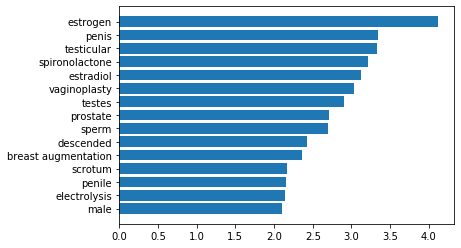

In [100]:
# plot 
N = 15
imp = svm.coef_[0]
names = features_names
imp,names = zip(*sorted(zip(imp,names), reverse=True)[:N])

imp = list(imp)
names = list(names)
imp.reverse()
names.reverse()

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.savefig(f'natal_sex_svm_feature_head_{N}.png')
plt.show()

In [79]:
len(imp)

30

ValueError: shape mismatch: objects cannot be broadcast to a single shape

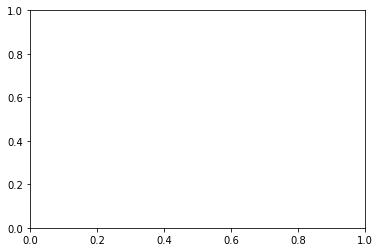